In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
CorrelationLensed = np.load("./ksz_reconstruction/NS_2048_R_2048_P_2048_DV_400_Lens_True.z-0.40-0.50/corr_coeffNS_2048_R_2048_P_2048_DV_400_Lens_True.npy")
CorrelationNotLensed = np.load("./ksz_reconstruction/NS_2048_R_2048_P_2048_DV_400_Lens_False.z-0.40-0.50/corr_coeffNS_2048_R_2048_P_2048_DV_400_Lens_False.npy")

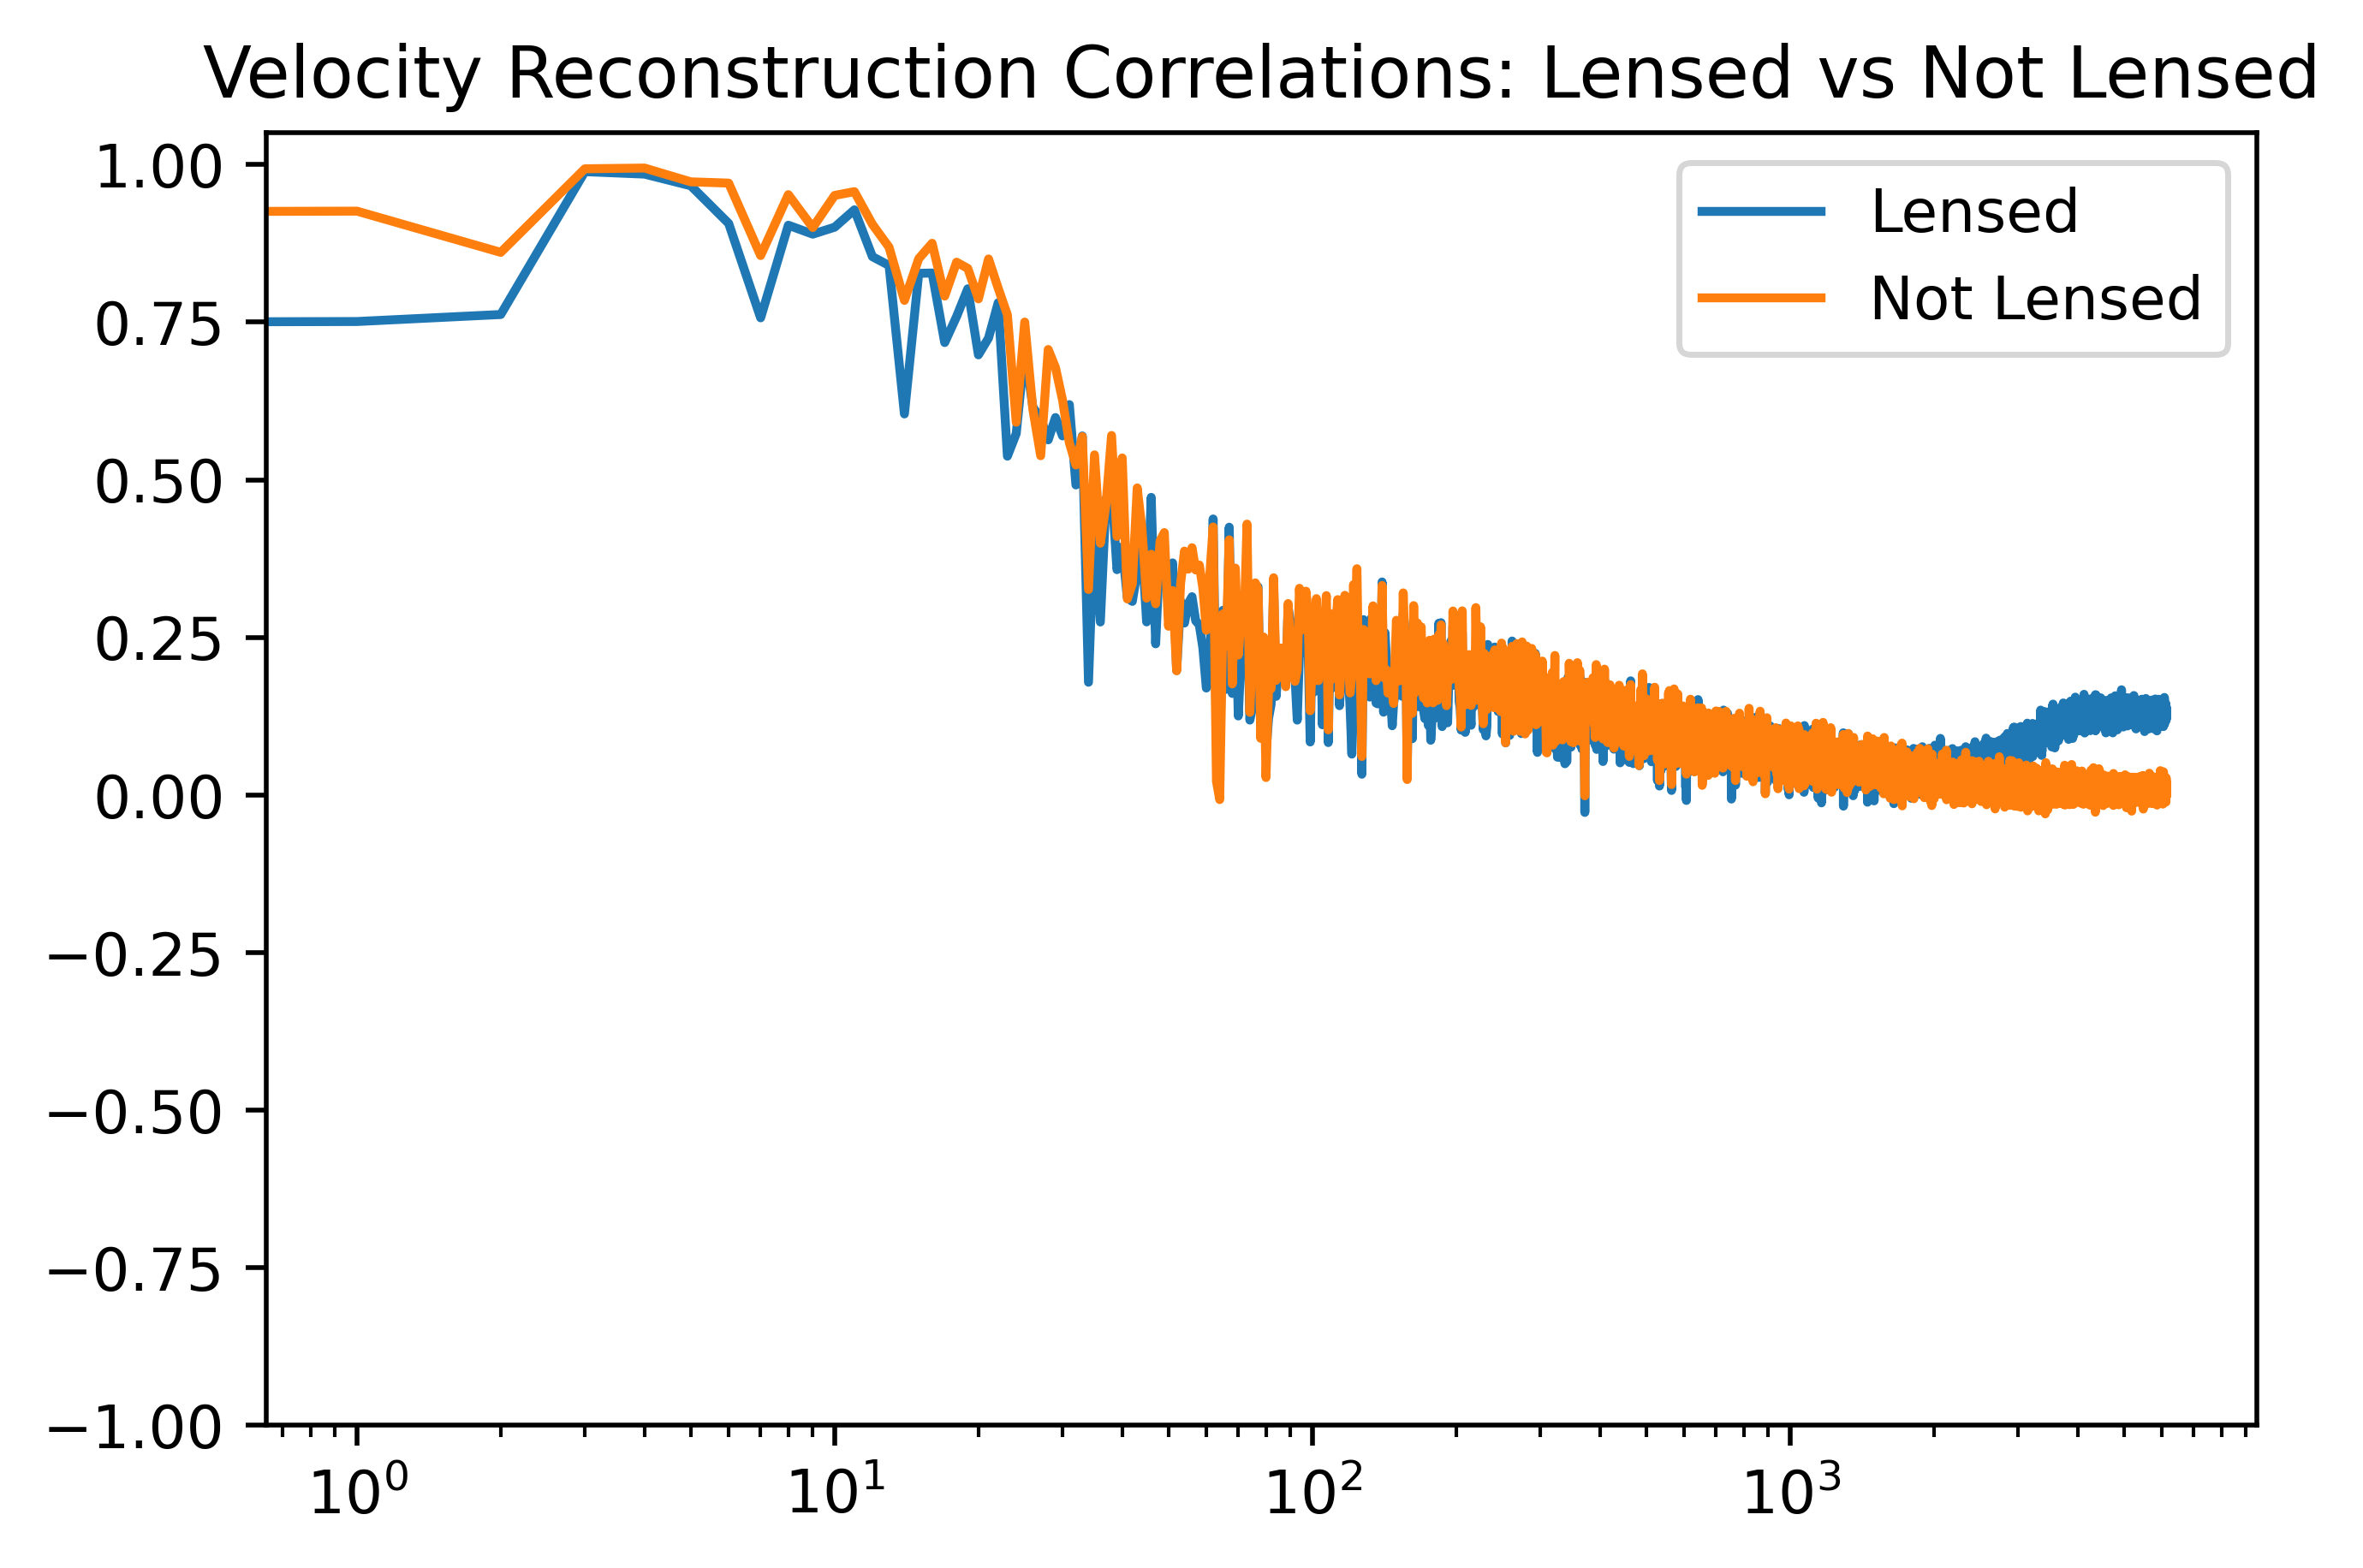

In [4]:
plt.figure(dpi=500)
plt.semilogx( CorrelationLensed, label="Lensed")
plt.semilogx( CorrelationNotLensed, label="Not Lensed")
plt.ylim(-1,1.05)
plt.title("Velocity Reconstruction Correlations: Lensed vs Not Lensed")
plt.legend();

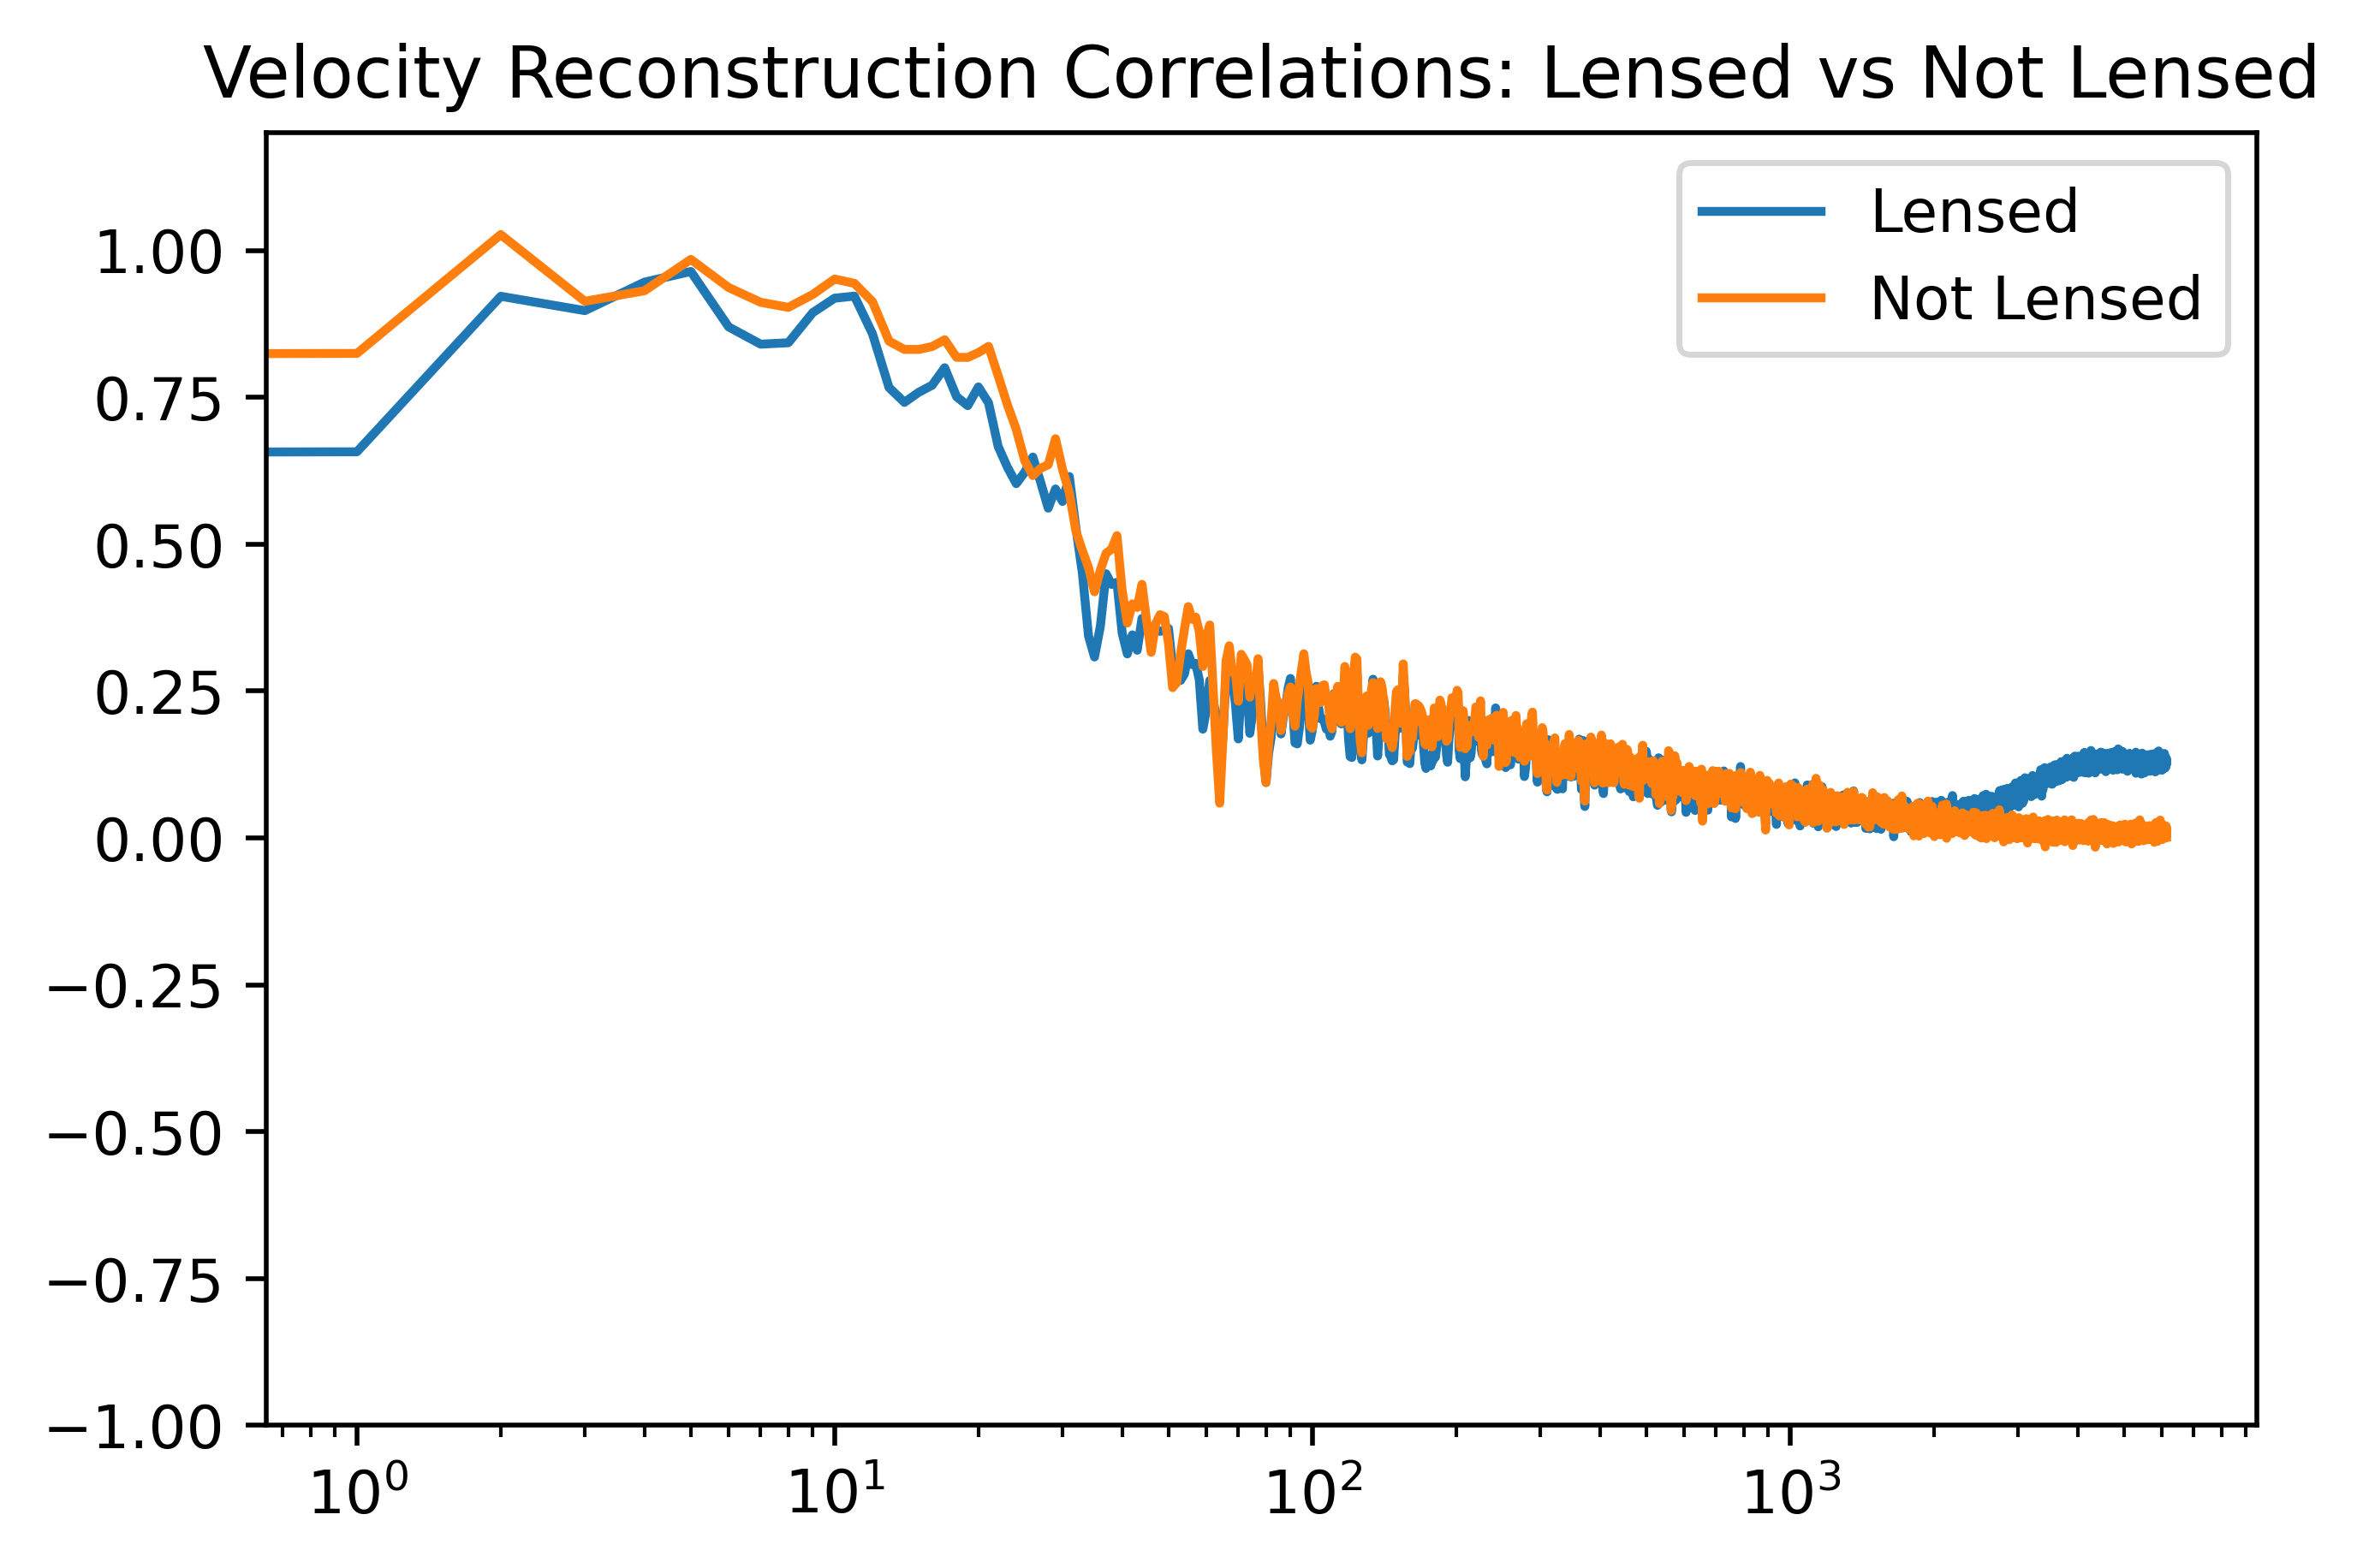

In [16]:
plt.figure(dpi=500)
plt.semilogx( savgol_filter(CorrelationLensed,9,5), label="Lensed")
plt.semilogx( savgol_filter(CorrelationNotLensed,9,5), label="Not Lensed")
plt.ylim(-1,1.2)
plt.title("Velocity Reconstruction Correlations: Lensed vs Not Lensed")
plt.legend();

# Generating CMB

In [4]:
import camb

In [5]:
pars = camb.CAMBparams()

In [54]:
h=0.69
pars.set_cosmology(H0=100.0*h, ombh2=0.048*h**2, omch2=0.262*h**2, mnu=0.06, omk=0);
pars.InitPower.set_params(As=2e-9, ns=0.96, r=0);
pars.set_for_lmax(6144, lens_potential_accuracy=0);

In [55]:
#calculate results for these parameters
results = camb.get_results(pars)

In [56]:
powers = results.get_cmb_power_spectra(pars, CMB_unit='K')

In [70]:
l=np.arange(0,len(powers['total'][:,0]))
cambFactor = l*(l+1)/(2*np.pi)
CMB_camb = powers['total'][:,0]/cambFactor
CMB_camb[0]=0.0

/tmp/ipykernel_588/844584546.py:3: RuntimeWarning: invalid value encountered in true_divide
  CMB_camb = powers['total'][:,0]/cambFactor


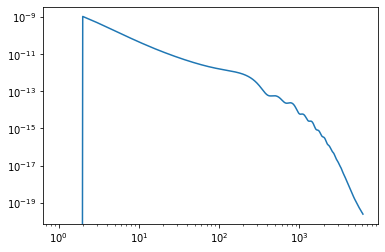

In [71]:
plt.loglog(CMB_camb)

In [58]:
fakeCMB = hp.synfast(powers['total'][:,0],nside=512);

/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(


/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. T

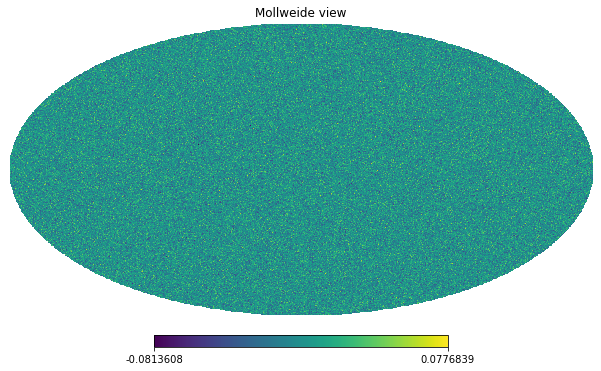

In [59]:
hp.mollview(fakeCMB);

In [68]:
ksz = hp.read_map("MAPS/kSZ_NS_2048_R_2048_P_2048_DV_400.fits")

/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/wurdahl/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [69]:
ksz_PS = hp.anafast(ksz)

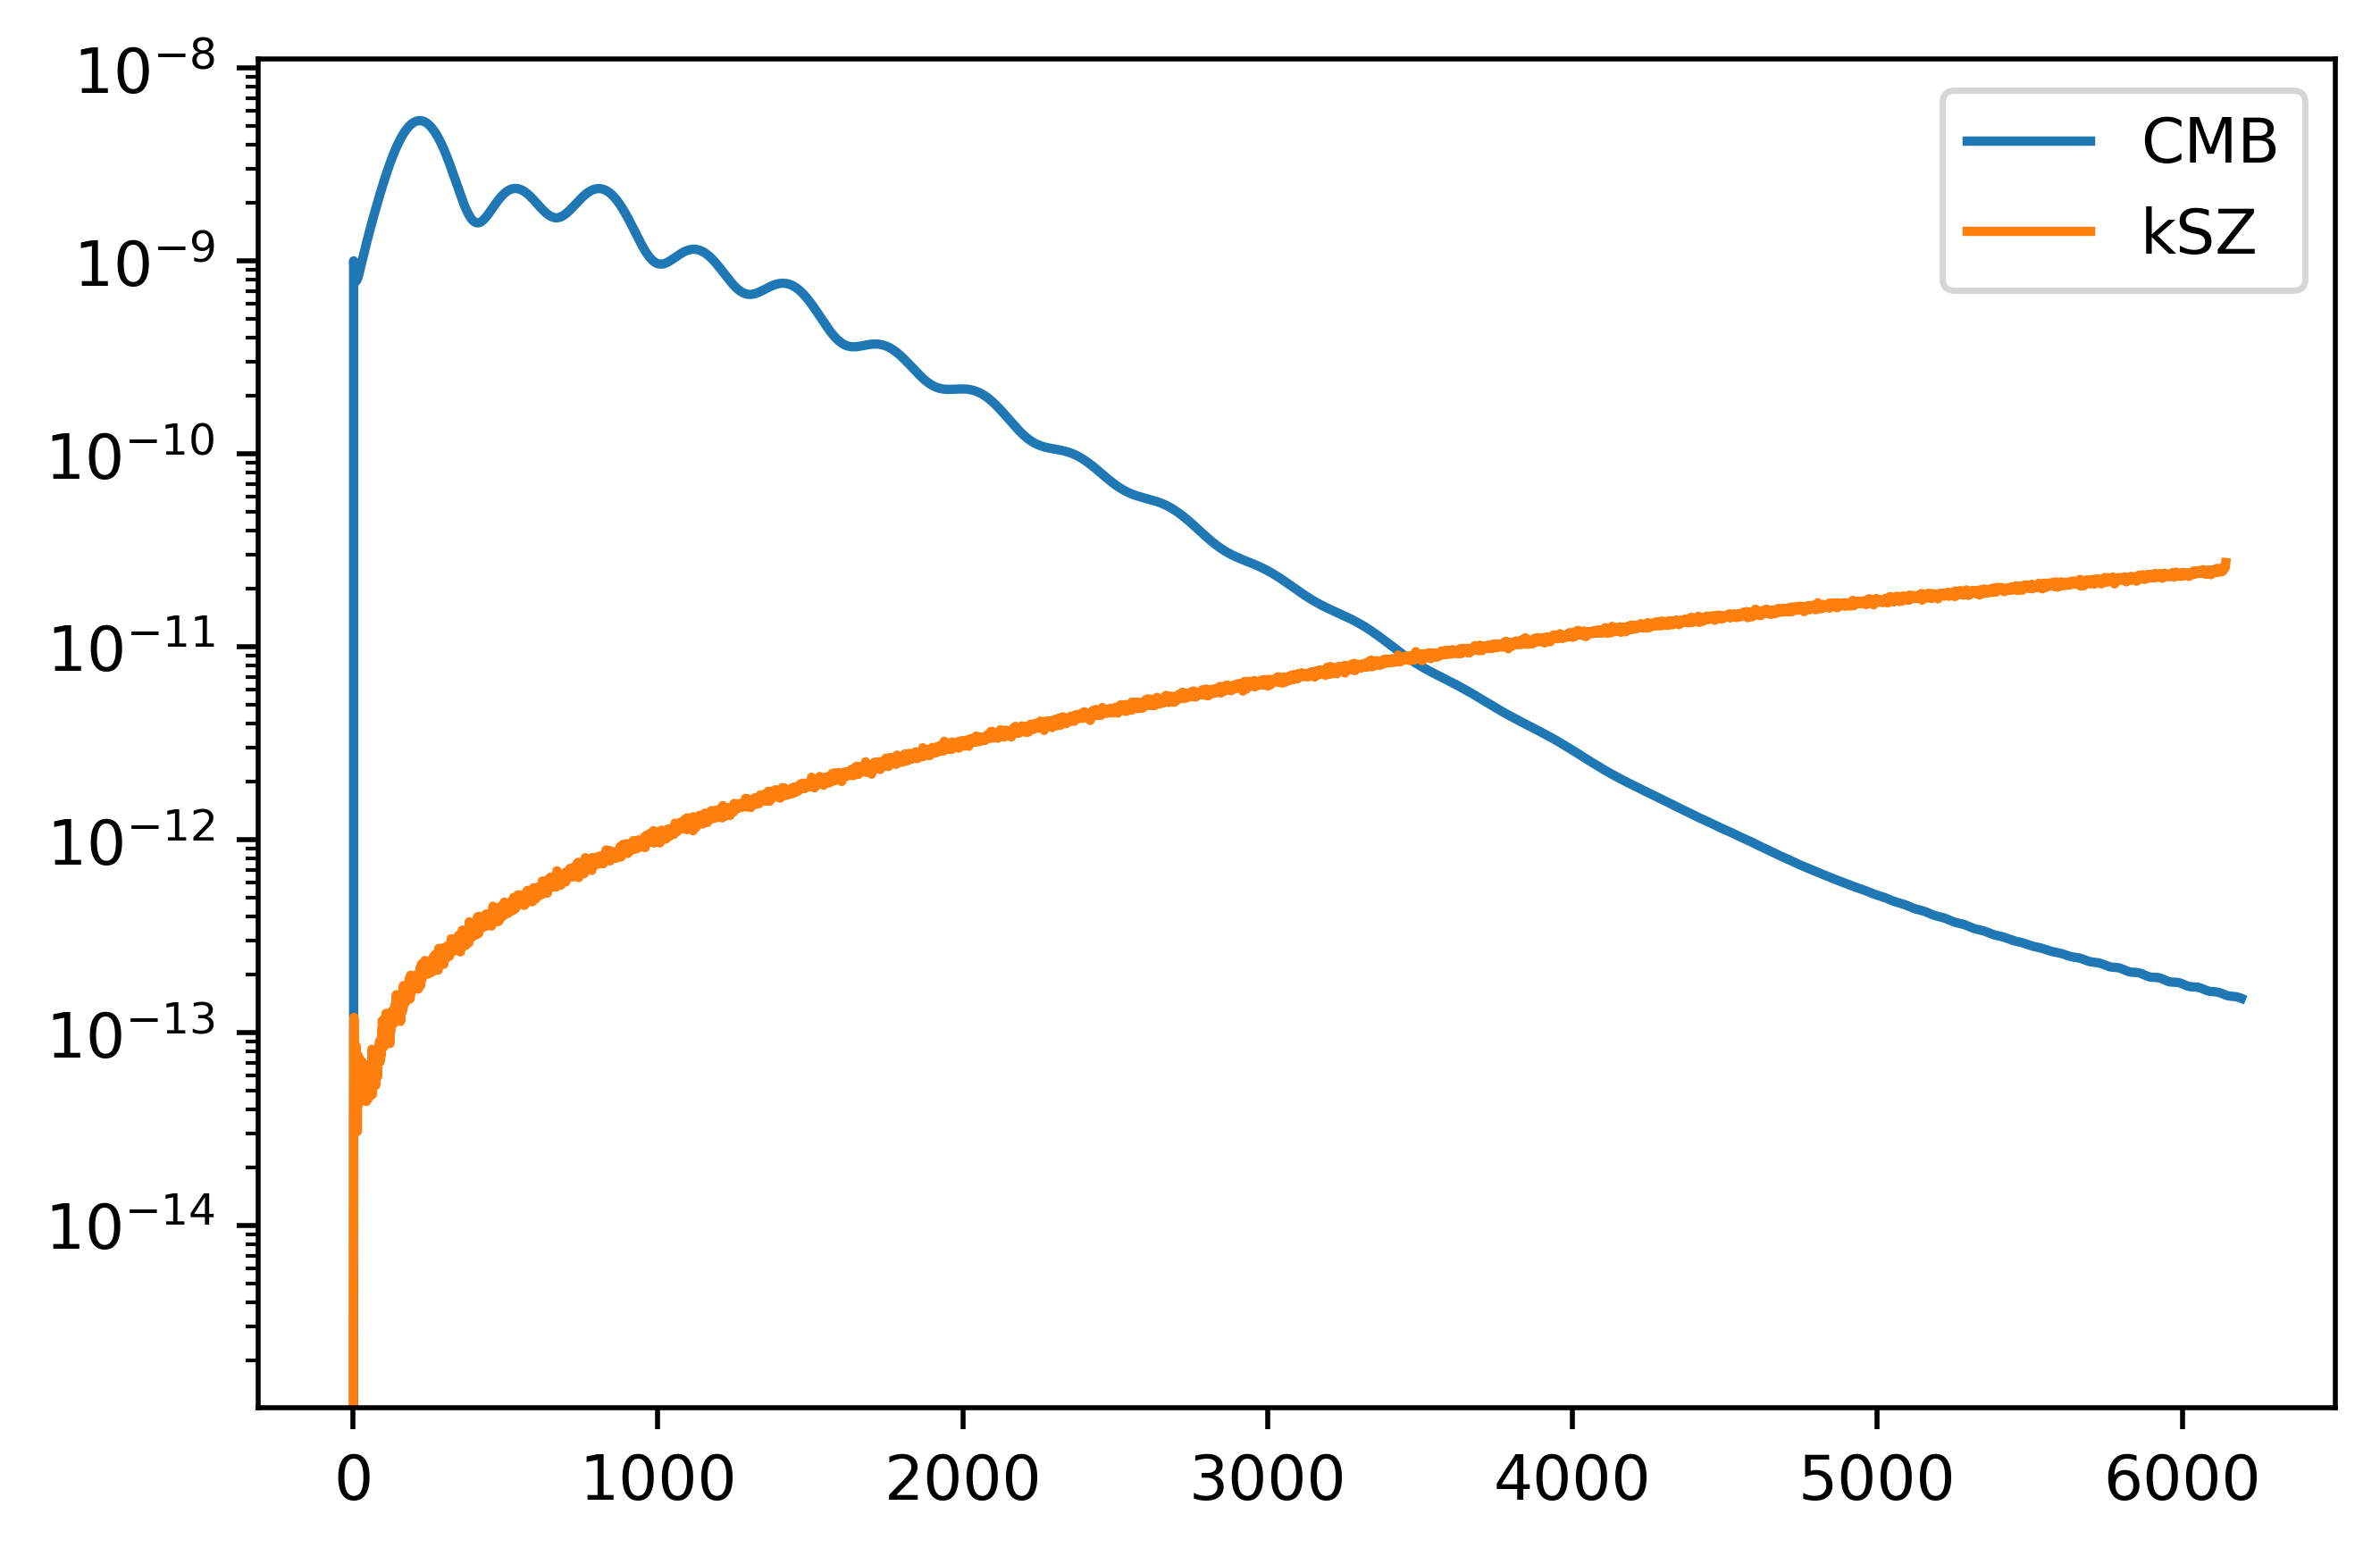

In [76]:
plt.figure(dpi=500)
plt.semilogy(CMB_camb*cambFactor)
plt.semilogy(ksz_PS*cambFactor[0:6144])
plt.legend(['CMB','kSZ'])